In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Copied from github

def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

In [4]:
# Copied from github 

def box_plt(feature, variable):
    plt.figure(figsize=(15,6)) 
    
    sns.boxplot(feature, x='Class',y=variable, data=data,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^",
                    "markerfacecolor":"white",
                    "markeredgecolor":"black",
                    "markersize":"8"});

---

<center> <h1> EDA </h1> </center> 

---

### Data Attributes:

    1.  Area (A): The area of a bean zone and the number of pixels within its boundaries.
    2.  Perimeter (P): Bean circumference is defined as the length of its border.
    3.  Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
    4.  Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the axis.
    5.  Aspect ratio (K): Defines the relationship between L and l.
    6.  Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
    7.  Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
    8.  Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
    9.  Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
    10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
    11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
    12. Compactness (CO): Measures the roundness of an object: Ed/L
    13. ShapeFactor1 (SF1)
    14. ShapeFactor2 (SF2)
    15. ShapeFactor3 (SF3)
    16. ShapeFactor4 (SF4)
    17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [5]:
data  = pd.read_csv("data/train.csv")
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [6]:
data_heads = data.iloc[:, 1:-1].columns.array # Excluding ID and target
data_heads

<PandasArray>
[           'Area',       'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
    'AspectRation',    'Eccentricity',      'ConvexArea',   'EquivDiameter',
          'Extent',        'Solidity',       'roundness',     'Compactness',
    'ShapeFactor1',    'ShapeFactor2',    'ShapeFactor3',    'ShapeFactor4']
Length: 16, dtype: object

In [7]:
data.shape

(10834, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [9]:
data[data_heads].describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


In [10]:
data[data_heads].isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

---
## Uni-Variate Data Analysis:

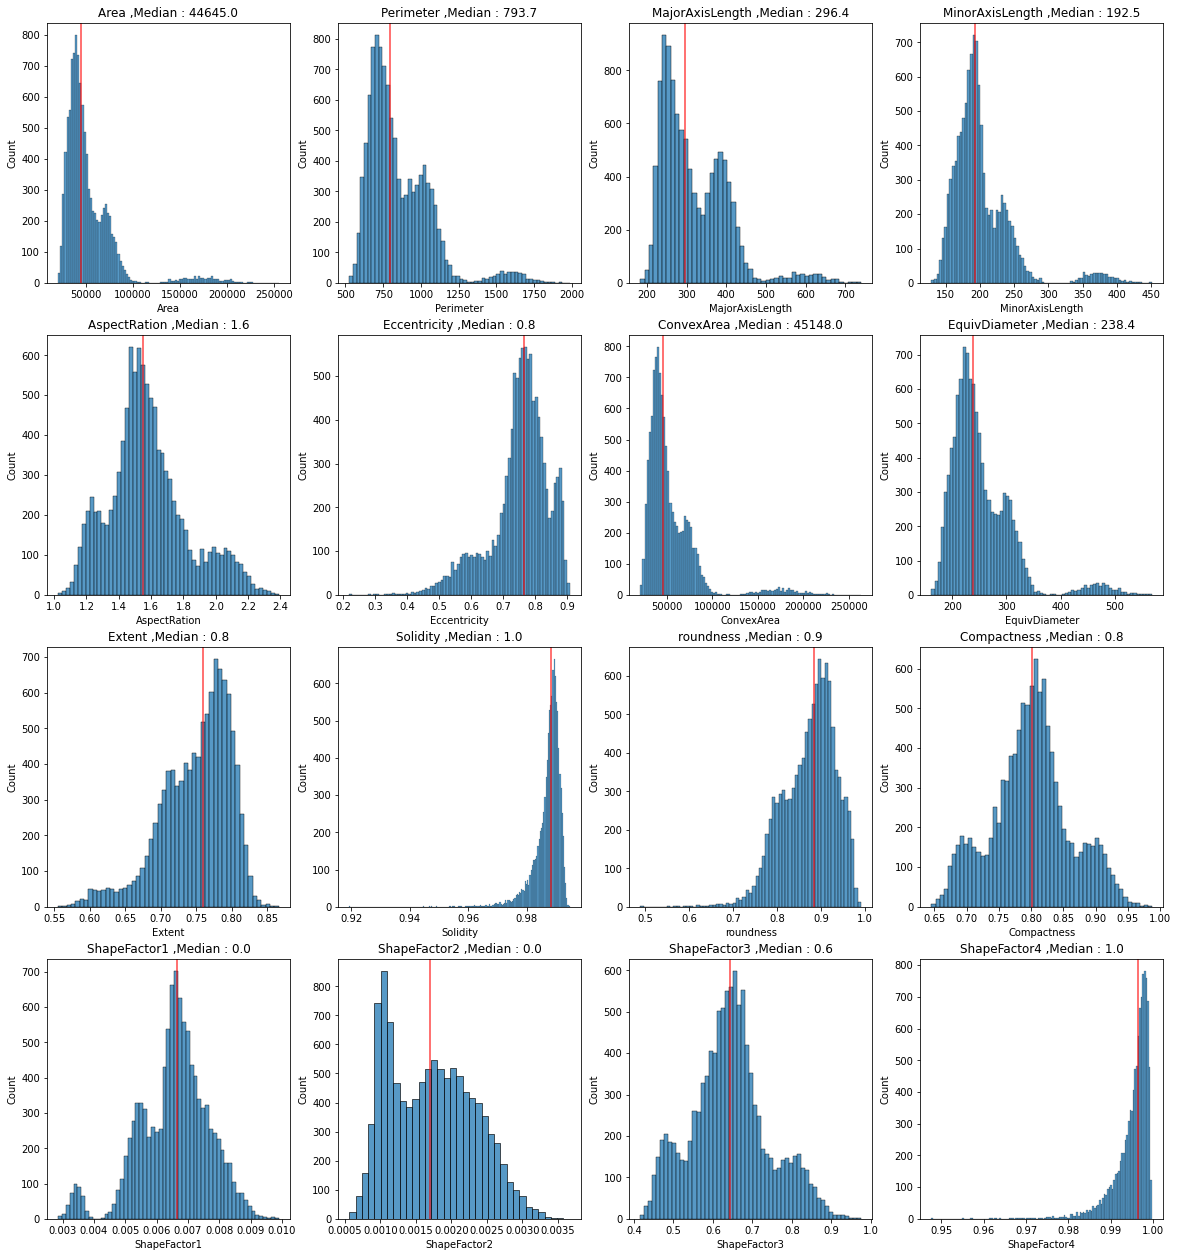

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
for i, axe in enumerate(axes.flatten()):
    sns.histplot(data[data_heads[i]], ax = axe)
    median = data[data_heads[i]].median()
    axe.set_title(data_heads[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red', lw=2, alpha = 0.55)

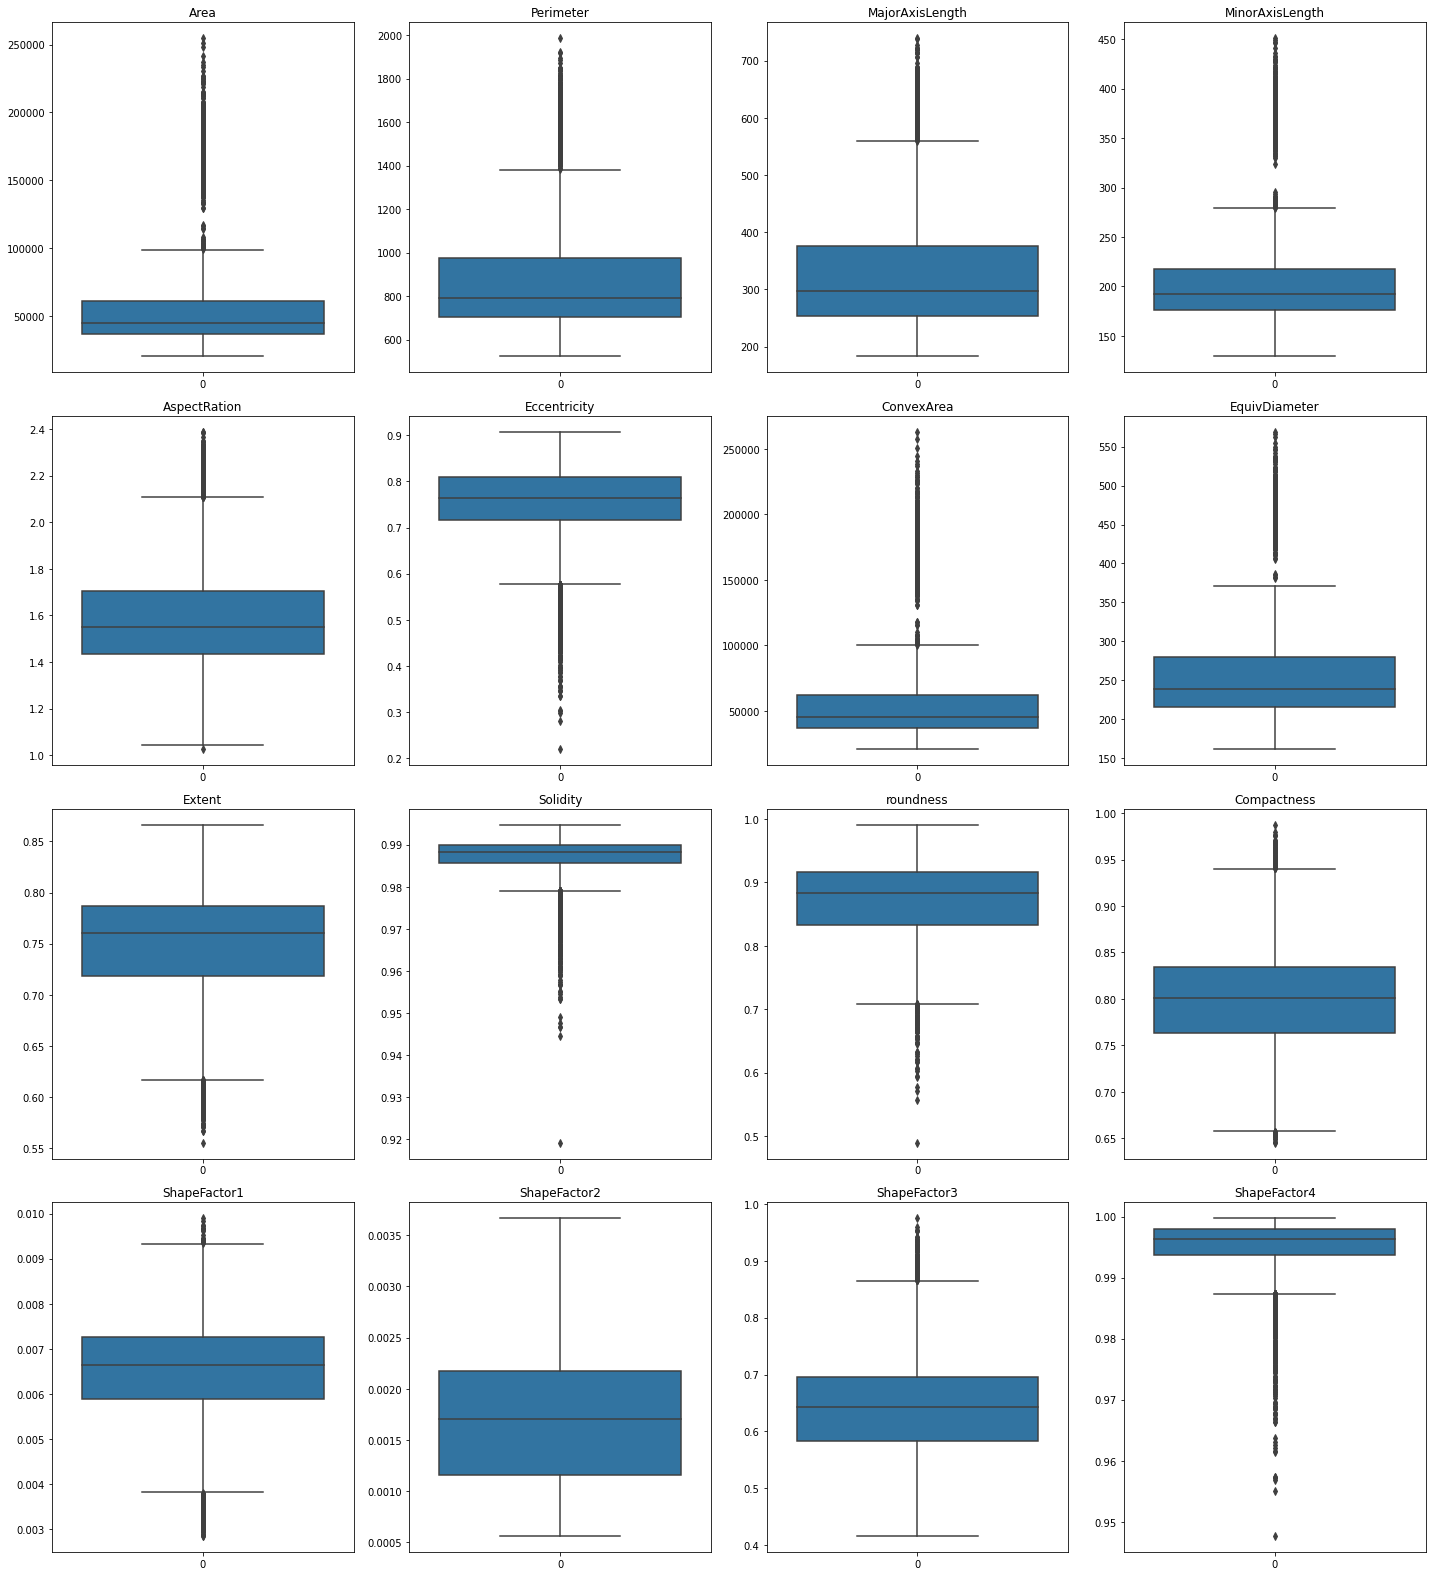

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
for i, axe in enumerate(axes.flatten()):
    sns.boxplot(data = data[data_heads[i]], ax = axe)
    axe.set_title(data_heads[i])
    
plt.tight_layout()
plt.show()

---

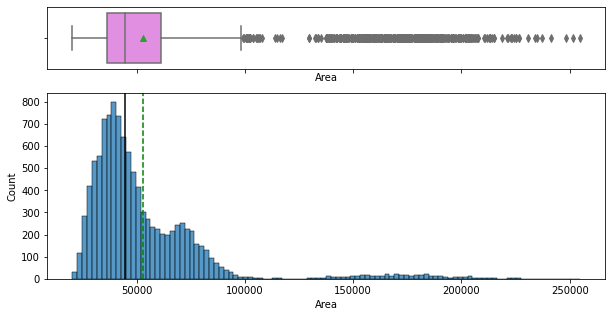

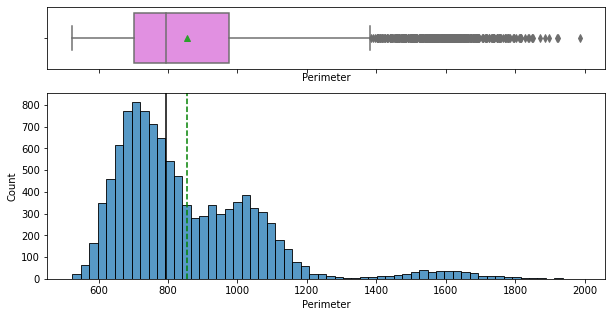

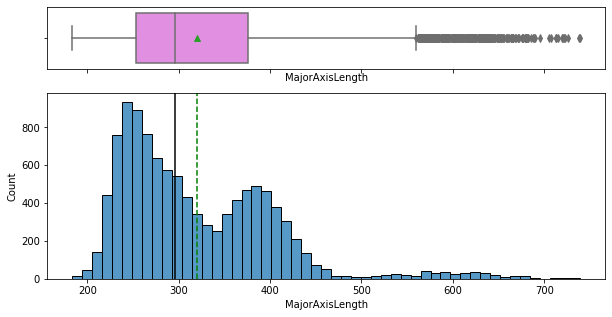

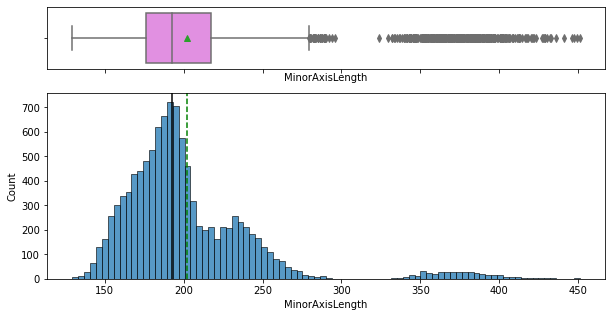

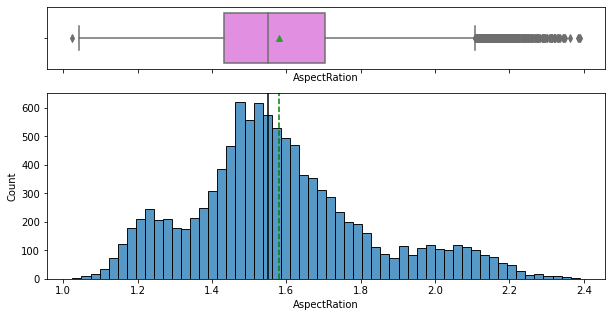

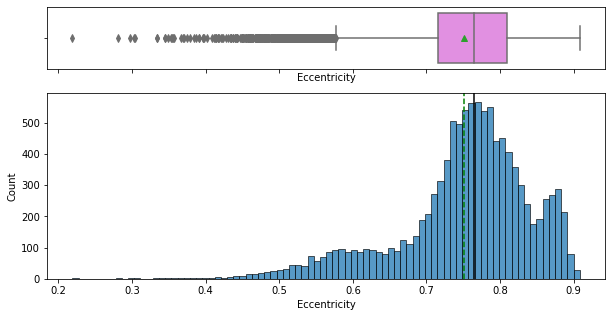

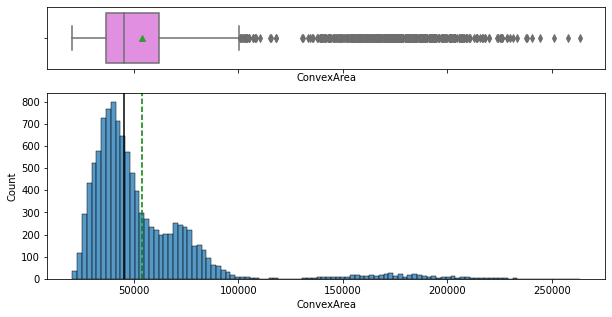

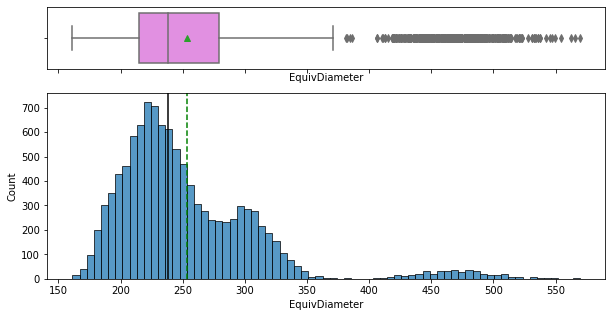

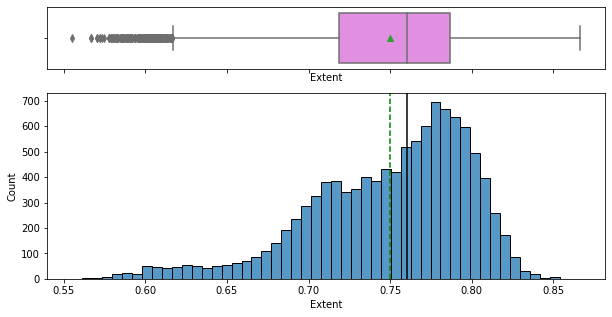

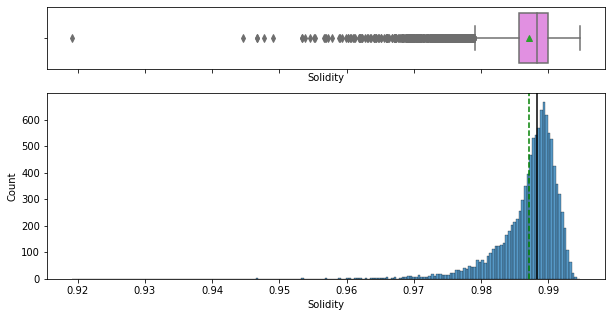

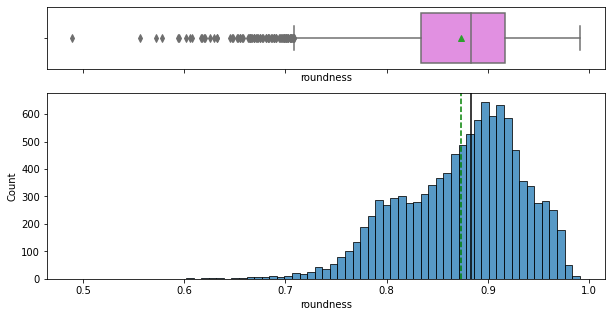

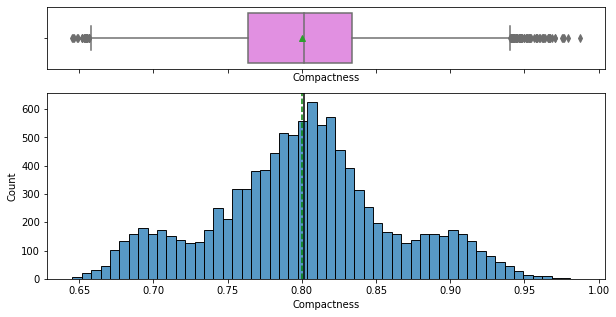

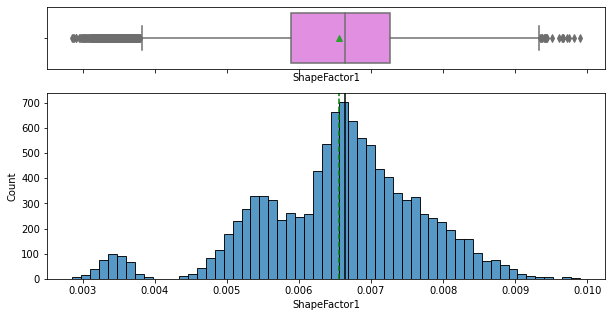

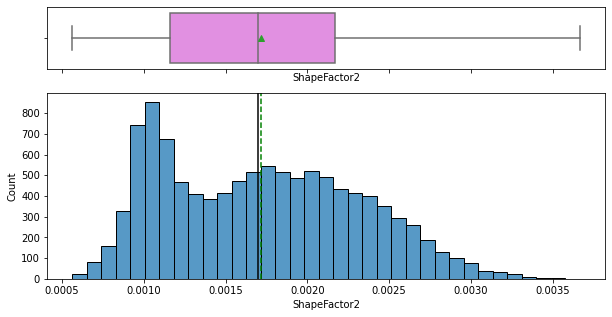

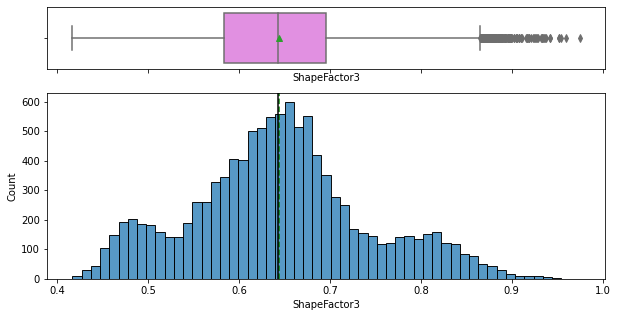

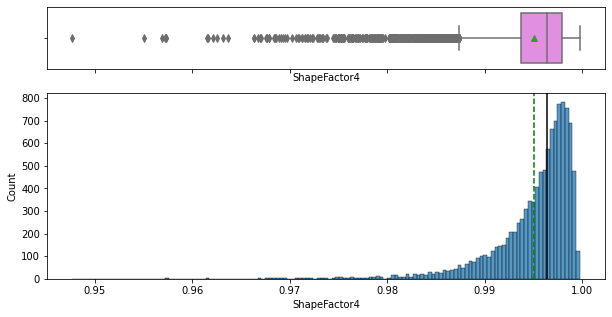

In [13]:
for col in data_heads:
    histogram_boxplot(data[col])

<div class="alert alert-block alert-info">
    - Area is right skewed bit lot of max outliers, we can observe few extreme values afer 210000. <br> 
    - Perimeter is right-skewed data with max outliers; from 1900 onwards, we can see few data points having significantly higher values. <br>
    - Major Axis Length is right-skewed data with max outliers; from 700 onwards, we can see few data points having significantly higher values. <br>
    - Minor Axis Length is right-skewed data with max outliers; from 300 onwards, we can see significantly higher values. <br>
    - Eccentricity is left-skewed with minimum outliers; we can see few data points having significantly lesser values <br>
    - EquivDiameter is right-skewed data. <br>
    - Extent is left-skewed data. <br>
    - Compactness is normally distributed. <br>
    - Shapefactor 1 is normally distributed with min and max outliers. <br>
    - ShapeFactor 2 is normally distributed without any outliers. <br> 
    - ShapeFactor 4 is extremely left skewed with minimum outliers. <br>
    - Comparing to ShapeFactor 3, 2, and 1 we can observe ShapeFactor 4 is extremely skewed. <br> 
    
    - Most of the features are skewed, some features having significantly higher or lower values.
    
</div> 

---

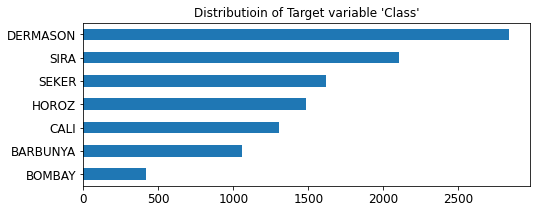

In [14]:
plt.figure(figsize=(8,3))
data['y'].value_counts().sort_values().tail(7).plot(kind='barh', fontsize=12)
plt.title("Distributioin of Target variable 'Class'");

- The Plot above shows how the target is distributed.

---

## Bi-Variate and Multi-Variate Data Analysis:

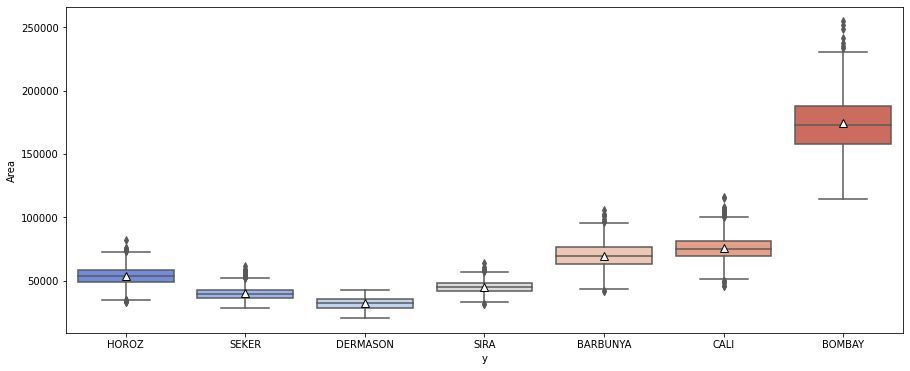

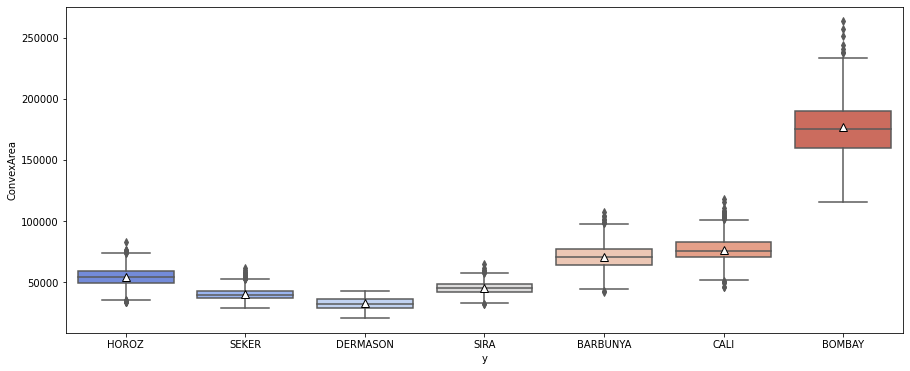

In [15]:
box_plt(data["y"], data['Area'])
box_plt(data["y"], data['ConvexArea'])

- BOMBAY having higher Area, follwed by Cali and Barbunya. Least Area is for Dermason and Seker.

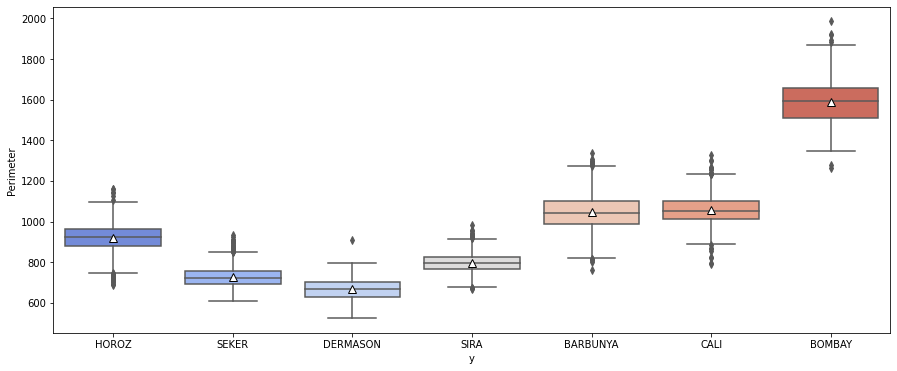

In [16]:
box_plt(data["y"], data['Perimeter'])

- Bombay having higher Perimeter, followed by Barbunya and Cali. Least Perimeter is for Dermason and Seker.

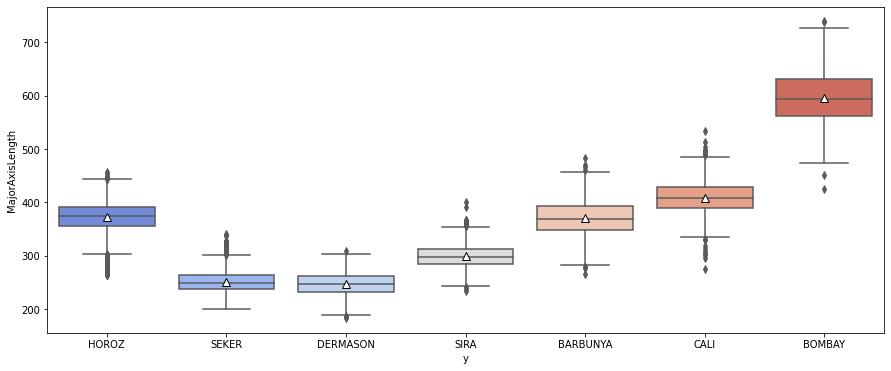

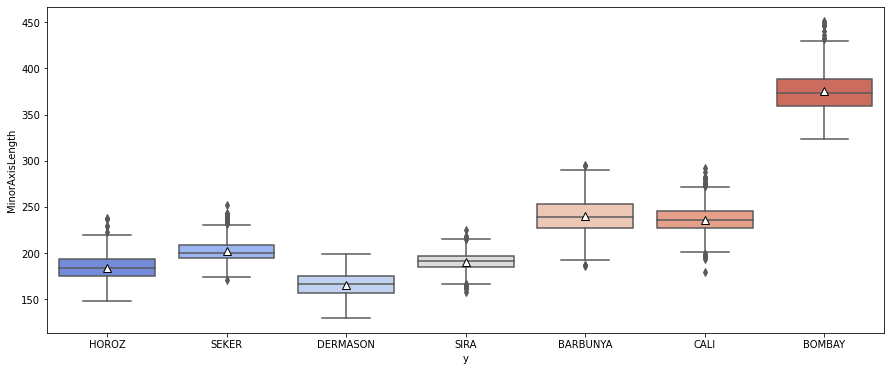

In [17]:
box_plt(data["y"], data['MajorAxisLength'])
box_plt(data["y"], data['MinorAxisLength'])

- Bombay having higher Major Axis Length followed by Calia and Barbunya, least Major Axis Length is for Dermason and Seker.
- Bombay having higher Minor Axis values, followed by Barbuya and Cali, least being Dermason. 

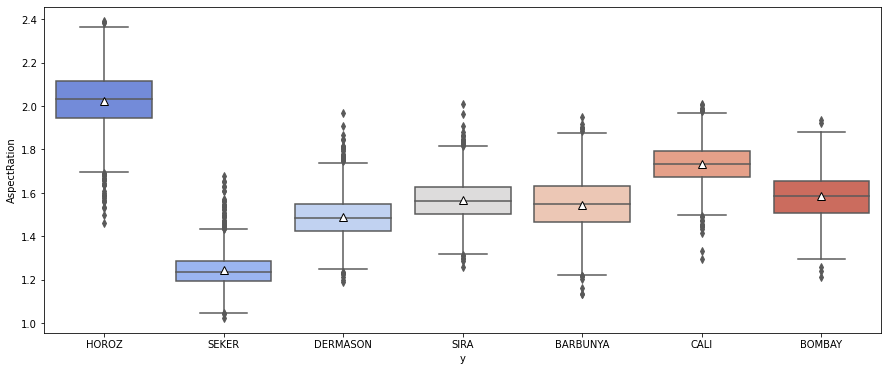

In [18]:
box_plt(data["y"], data['AspectRation'])

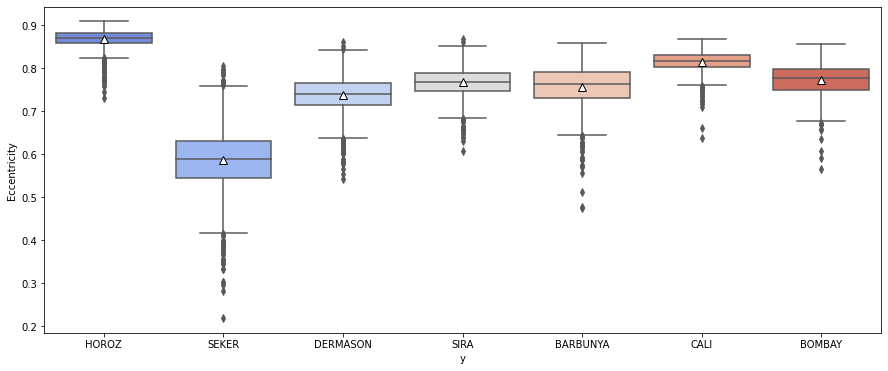

In [19]:
box_plt(data["y"], data['Eccentricity'])

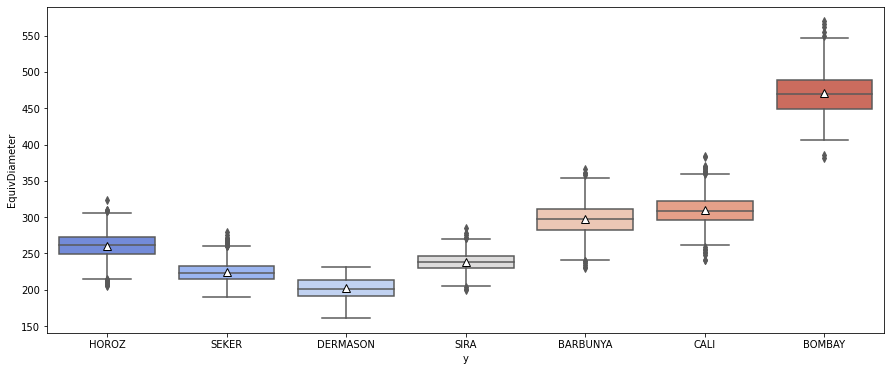

In [20]:
box_plt(data["y"], data['EquivDiameter'])

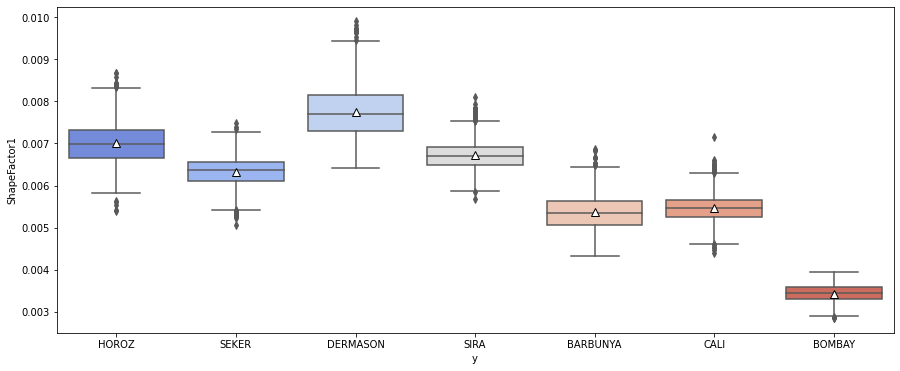

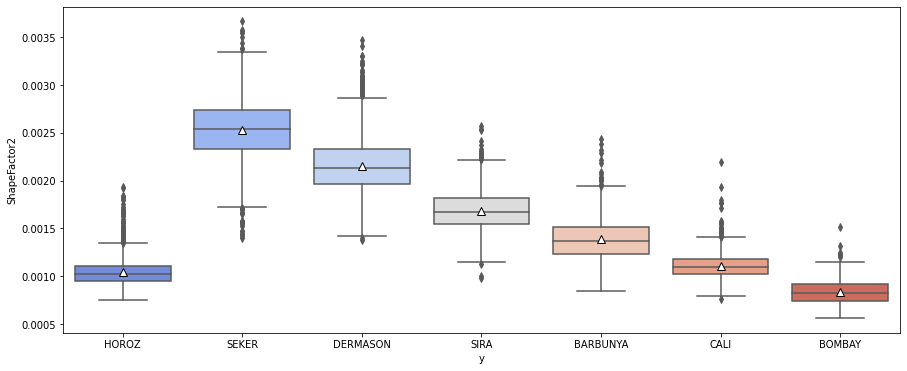

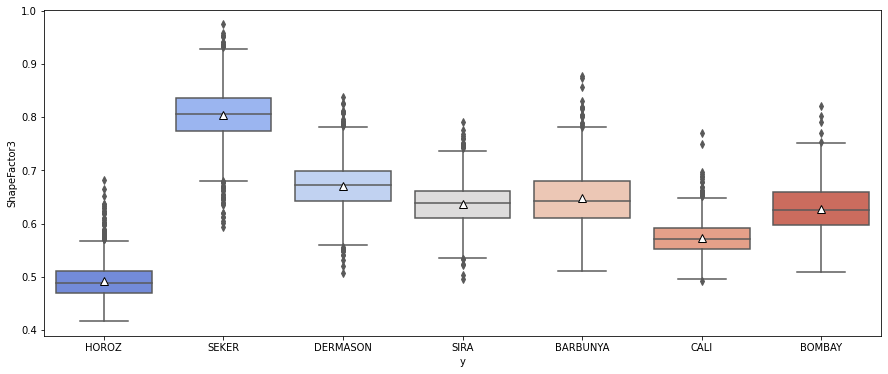

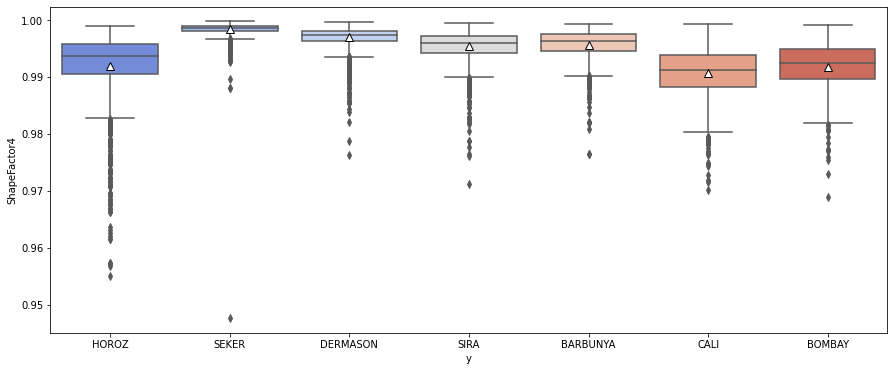

In [21]:
box_plt(data["y"], data['ShapeFactor1'])
box_plt(data["y"], data['ShapeFactor2'])
box_plt(data["y"], data['ShapeFactor3'])
box_plt(data["y"], data['ShapeFactor4'])

- ShapeFactor 2 and 3 merely have the same trend, but ShapeFactor4 has a different (**Skewed**) one.


In [22]:
# sns.pairplot(data[data_heads]);

In [23]:
# plt.figure(figsize=(14, 14))
# dat_cor = data.corr()
# sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True);

- From the above we conclude that the majority of features are having higher correlation. (**Calculated from each others**)
- We can handle these correlation issues in two ways: <br>
1) either drop those highly correlated features<br>
2) Leave them as it is because Tree-based models doesn't get affected with correlated traits, when they decide to split, the tree will choose only one of the perfectly correlated features. However, Linear Models are not immune to that problem and you should fix it before training the model.

# **SCALING THE DATA**

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = data.drop(['ID','y'], axis=1)
y = data['y']
scaler_mm=preprocessing.MinMaxScaler()
scaler_rb = preprocessing.RobustScaler()
scaler_ss=preprocessing.StandardScaler()
X_mm=scaler_mm.fit_transform(X)
X_rb=scaler_rb.fit_transform(X)
X_ss=scaler_ss.fit_transform(X)

In [25]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=20, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = X_rb[train_index], X_rb[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

In [26]:
# parameter_grid = {
#     'C': [1, 10, 50], 
#     'gamma': [0.001, 0.0001],
#     # 'kernel': ['linear', 'poly', 'rbf']
#     'kernel': ['linear', 'rbf', 'sigmoid']
# }

In [27]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# svc = SVC()
# grid_search = GridSearchCV(
#         svc,
#         param_grid=parameter_grid)

# grid_search.fit(X_train, y_train)
# print('Best score: {}'.format(grid_search.best_score_))
# print('Best parameters: {}'.format(grid_search.best_params_))
# grid_search.best_estimator_

In [28]:
#  train_df, val_df = train_test_split(data, test_size=0.2, random_state=42,shuffle=True)

# X_train = train_df.drop(columns=['ID', 'y'])
# y_train = train_df['y']
# X_mm=scaler_mm.fit_transform(X_train)
# X_rb=scaler_rb.fit_transform(X_train)
# X_ss=scaler_ss.fit_transform(X_train)

# X_val = val_df.drop(columns=['ID', 'y'])
# y_val = val_df['y']
# Xval_mm=scaler_mm.fit_transform(X_val)
# Xval_rb=scaler_rb.fit_transform(X_val)
# Xval_ss=scaler_ss.fit_transform(X_val)

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svc = SVC(probability= True, random_state=42, C=2, gamma=0.3)
from catboost import CatBoostClassifier
cbc=CatBoostClassifier(random_state=42, max_depth=3,silent=True)

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(early_stopping = False,random_state=42,hidden_layer_sizes=(150,150),activation = 'relu',solver='adam',alpha=0.015,learning_rate='adaptive')

estimators = [("svc",svc),("cb",cbc),("mlp",clf)]
model=StackingClassifier(estimators=estimators)
model.fit(X_train,y_train)

StackingClassifier(estimators=[('svc',
                                SVC(C=2, gamma=0.3, probability=True,
                                    random_state=42)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7fdd6670fa90>),
                               ('mlp',
                                MLPClassifier(alpha=0.015,
                                              hidden_layer_sizes=(150, 150),
                                              learning_rate='adaptive',
                                              random_state=42))])

In [31]:
# print("The accuracy of the classifier on the validation set is ", (clf.score(X_val, y_val)))
from sklearn.metrics import f1_score
pred_val=model.predict(X_val)
f1_score(y_val, pred_val,average="macro")

0.93637934873653

In [32]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [33]:
X_test = test_df.drop(columns=['ID'])
x_test_rb=scaler_rb.fit_transform(X_test)
y_test_predicted = model.predict(x_test_rb)

test_df['y'] = y_test_predicted

test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [34]:
test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)